done
141


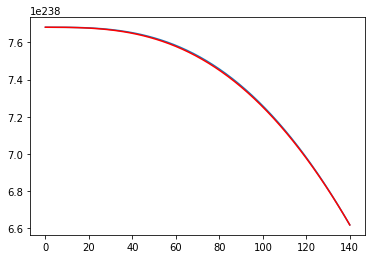

In [45]:
import matplotlib.pyplot as plt
import math
import scipy.special
#import numpy as np

#give the length of the consecutive decreasing subsequence we are avoiding
k=4

def pop_zeros(items):
    while items[-1] == 0:
        items.pop()


#finds the next row containing the antidifference, with 0 at the start or end being spec in the input
def nextrow(row,spec):
    #print(row)
    t=len(row)
    newrow=[0]*(t+1)
    if spec=="start":
        for i in range(1,t+1):
            newrow[i]=newrow[i-1]+row[i-1]
    if spec=="end":
        for i in range(2,t+2):
            newrow[-i]=newrow[-i+1]-row[-i+1]
    return(newrow)

#finds the n'th row from the n-k'th row
def helperrec(l):
    global anss
    global k
    h0row=anss[l-k-1][:]
    
    pop_zeros(h0row)
    
    h1row=nextrow(h0row,"end")
    
    for i in range(k-2):
        nrow=nextrow(h1row,"start")
        h1row=nrow
    
    
    sum=0
    for i in range(l-1):
        sum+=anss[l-2][i]
    
    anss[l-1][0]=sum
    for i in range(1,l):
        anss[l-1][i]=anss[l-1][i-1]+nrow[i-1]
        
    
        
    
    


#A function that computes all f(m,n) up to some n in the global list of lists anss
#f(m,n)=anss[n][m]
def ndds(n):
    global anss
    anss = [[0]*n for _ in range(n)]
    
    #initial values for k=3
    #anss[0][0]=1;anss[1][0]=1;anss[1][1]=1;anss[2][0]=2;anss[2][1]=2;anss[2][2]=1
    
    #initial values for k=4
    anss[0][0]=1;anss[1][0]=1;anss[1][1]=1;anss[2][0]=2;anss[2][1]=2;anss[2][2]=2;anss[3][0]=6;anss[3][1]=6;anss[3][2]=6;anss[3][3]=5
    
    #initial values for k=5
    
    for i in range(k+1,n+1):
        helperrec(i)
        
    for row in anss:
        pop_zeros(row)
ndds(250)
#ndds(15)
#print(anss)
print("done")



#distribution for k=4
def phi4(x):
    r=1.0384156372665563
    return (math.exp(-r*x)+math.sin(r*x)+math.cos(r*x))*r/2

#plt.plot(anss[170])

plt.plot(anss[140])

#summed=sum(anss[170])
summed=sum(anss[140])

#s=len(anss[170])
s=len(anss[140])
print(s)
#const=2*math.pi/(3*math.sqrt(3))*(math.exp(-2*math.pi/(3*math.sqrt(3))))
hyp=[0]*s
for i in range(s):
    hyp[i]=phi4((i+1)/s)*summed/s
    #hyp[i]=const*math.exp(-2*math.pi*(i+1)/(s*3*math.sqrt(3)))*summed/s
    #hyp[i]=summed*2*math.pi*math.exp(-math.pi*i/(3*math.sqrt(3)*s))*(math.sqrt(3)*math.sin(math.pi*i/(3*s))+3*math.cos(math.pi*i/(3*s)))/(9*math.sqrt(3)*s)

#print(hyp)
plt.plot(hyp,'r')


plt.show()

#checking an example of the identity for k=4
#anss[14][7]
#anss[14][0]-anss[11][0]*scipy.special.comb(7,3)+anss[10][0]*scipy.special.comb(7,4)-anss[7][0]*scipy.special.comb(7,7)
